<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047>Transformaciones por Potencias </font> </center>

Cuando el sesgo de la distribución es negativo (cola más larga hacia la izquierda) nos interesará lo contrario: comprimir la cola de la izquierda y extender la de la derecha. Si lo pensamos, esto puede hacerse elevando cada valor al cuadrado o al cubo. Los productos resultantes de los valores pequeños estarán menos alejados que los resultantes de valores grandes, con lo que la distribución se parecerá más a una normal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df=pd.read_csv('numericos.csv')
df.head()

,0,1,2
0,0.255228,0.902346,0.733752
1,0.226339,0.925600,0.385178
2,0.205234,0.921390,0.547819
3,0.231553,0.885718,0.880428
4,0.185737,0.889161,0.953430


Aplicando una transformación de la forma
$$
x'=x^a,
$$
donde $x\in[1,\infty)$, obtuvimos los siguientes exponentes para cada variable

Variable|Sesgo original|$a$
--|--|--
'0'|6.0|-11
'1'|-2.77|17
'2'|-1.01|3

In [2]:
#Sesgo
df.skew()

0    6.000314
1   -2.772736
2   -1.012379
dtype: float64

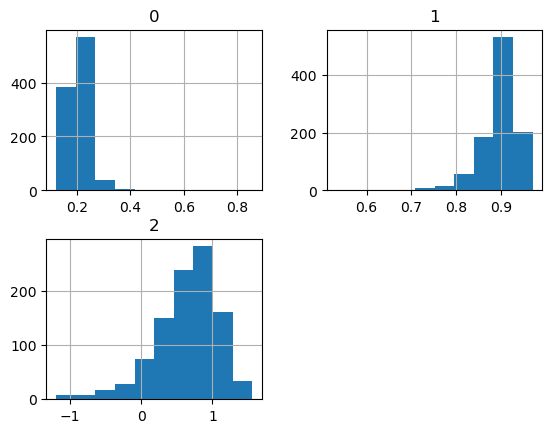

In [4]:
df.hist();

In [5]:
df_copy = df.copy()

In [6]:
# Compensando la variable '0'
# Variable desplazada a 1
x = df['0'] - df['0'].min() + 1

In [7]:
#Aplicando la transformación de potencias con a=-11
a = -11
df_copy['0'] = x**a
df_copy['0'].skew()

0.04181647238238833

<Axes: >

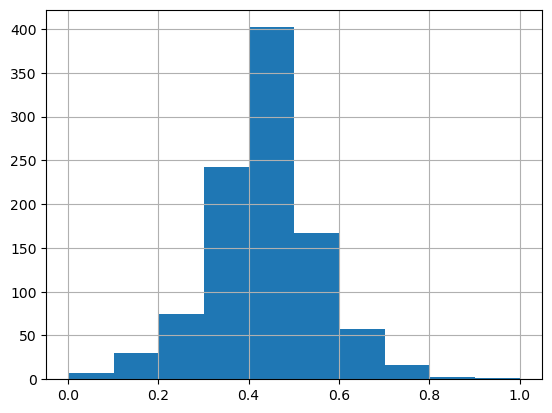

In [8]:
df_copy['0'].hist()

In [ ]:
#Aplicando la transformación de potencias con a=17


In [9]:
# Compensando la variable '1'
a = 17
x = df['1'] - df['1'].min() + 1
df_copy['1'] = x**a
df_copy['1'].skew()

-0.027448039332947635

In [ ]:
#Aplicando la transformación de potencias con a=3


In [10]:
# Compensando la variable '2'
a = 3
x = df['2'] - df['2'].min() + 1
df_copy['2'] = x**a
df_copy['2'].skew()

0.03113961761990119

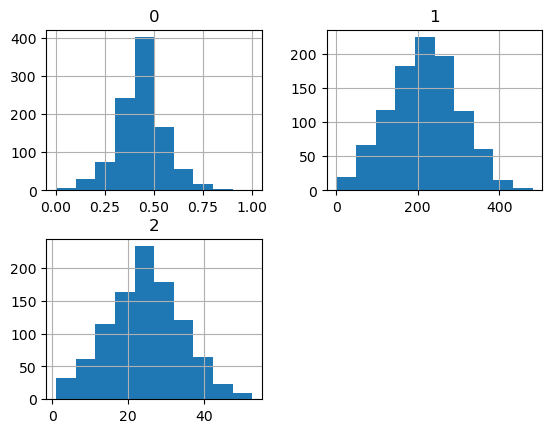

In [12]:
df_copy.hist();

---

# Familia de transformaciones de potencia
$$
x'=\frac{x^\lambda-1}{\lambda},
$$
haciendo $\displaystyle\lim_{\lambda\rightarrow0}\frac{x^\lambda-1}{\lambda}$ se tiene
$$
x'=\ln(x).
$$

## Transformación Box-Cox
$$
x'=\left\{\begin{array}{lr}
\dfrac{x^\lambda-1}{\lambda} & \lambda\neq0\\
\ln(x) & \lambda=0
\end{array}\right.
$$

In [20]:
LMB = [-5,-1,0.5,0,2,3,4]
LMB


[-5, -1, 0.5, 0, 2, 3, 4]

In [24]:
LMB = [-5,-1,0.5,0,2,3,4]
x = np.linspace(0.1,2,100)
x

array([0.1       , 0.11919192, 0.13838384, 0.15757576, 0.17676768,
       0.1959596 , 0.21515152, 0.23434343, 0.25353535, 0.27272727,
       0.29191919, 0.31111111, 0.33030303, 0.34949495, 0.36868687,
       0.38787879, 0.40707071, 0.42626263, 0.44545455, 0.46464646,
       0.48383838, 0.5030303 , 0.52222222, 0.54141414, 0.56060606,
       0.57979798, 0.5989899 , 0.61818182, 0.63737374, 0.65656566,
       0.67575758, 0.69494949, 0.71414141, 0.73333333, 0.75252525,
       0.77171717, 0.79090909, 0.81010101, 0.82929293, 0.84848485,
       0.86767677, 0.88686869, 0.90606061, 0.92525253, 0.94444444,
       0.96363636, 0.98282828, 1.0020202 , 1.02121212, 1.04040404,
       1.05959596, 1.07878788, 1.0979798 , 1.11717172, 1.13636364,
       1.15555556, 1.17474747, 1.19393939, 1.21313131, 1.23232323,
       1.25151515, 1.27070707, 1.28989899, 1.30909091, 1.32828283,
       1.34747475, 1.36666667, 1.38585859, 1.40505051, 1.42424242,
       1.44343434, 1.46262626, 1.48181818, 1.5010101 , 1.52020

In [22]:
def potencia(x,lmb):
    if lmb==0:
        return np.log(x)
    else:
        return (x**lmb -1)/lmb

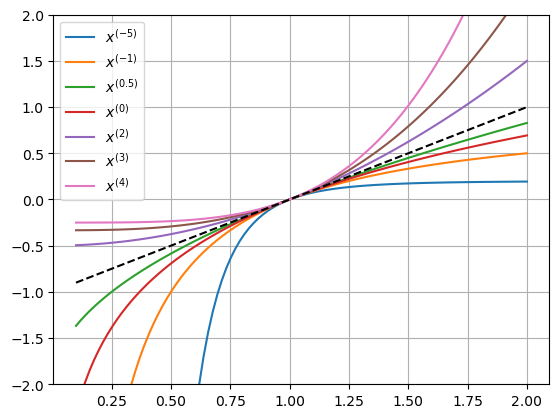

In [23]:
for lmb in LMB:
    xp = potencia(x,lmb)
    plt.plot(x, xp, label='$x^{('+str(lmb)+')}$')
plt.plot(x,x-1, '--k')
plt.legend()
plt.ylim([-2,2])
plt.grid()

#### Transformación Box-Cox Librerías

In [25]:
from scipy.stats import boxcox

In [26]:
sesgo=pd.read_csv('sesgo.csv')
sesgo.head(2)

,1.0,1.1,1.2,1.4,1.5,2.5,3.0,0.7,0.6,0.8,...,0.4,-1.0,-0.8,-0.6,-0.5,-2.0,-1.5,-1.3,-2.5,-3.0
0,4.287419,4.078224,2.410316,1.864664,11.968746,-0.403019,0.473020,4.975822,3.037414,2.892491,...,0.838508,5.541238,4.947706,3.559693,7.864133,22.867150,22.242351,22.833589,21.672629,2.851895
1,6.692587,6.596364,-0.467649,4.196815,9.522961,-0.366849,0.211353,1.000911,1.497043,2.665020,...,1.213810,4.015426,7.715773,6.496774,5.833801,18.040815,22.122988,18.310630,21.197021,3.053828


In [27]:
sesgo.shape

(1000, 21)

In [28]:
#Mejor exponente mejor sesgo
LMB = np.linspace(-20,20,100)
LMB

array([-20.        , -19.5959596 , -19.19191919, -18.78787879,
       -18.38383838, -17.97979798, -17.57575758, -17.17171717,
       -16.76767677, -16.36363636, -15.95959596, -15.55555556,
       -15.15151515, -14.74747475, -14.34343434, -13.93939394,
       -13.53535354, -13.13131313, -12.72727273, -12.32323232,
       -11.91919192, -11.51515152, -11.11111111, -10.70707071,
       -10.3030303 ,  -9.8989899 ,  -9.49494949,  -9.09090909,
        -8.68686869,  -8.28282828,  -7.87878788,  -7.47474747,
        -7.07070707,  -6.66666667,  -6.26262626,  -5.85858586,
        -5.45454545,  -5.05050505,  -4.64646465,  -4.24242424,
        -3.83838384,  -3.43434343,  -3.03030303,  -2.62626263,
        -2.22222222,  -1.81818182,  -1.41414141,  -1.01010101,
        -0.60606061,  -0.2020202 ,   0.2020202 ,   0.60606061,
         1.01010101,   1.41414141,   1.81818182,   2.22222222,
         2.62626263,   3.03030303,   3.43434343,   3.83838384,
         4.24242424,   4.64646465,   5.05050505,   5.45

In [33]:
pd.DataFrame(boxcox(sesgo['1.0'],-1)).skew()[0]

-19.015549976271917

In [29]:
mejor_exp = {}
for v in sesgo:
    x = sesgo[v] - sesgo[v].min() + 1 #Variable desplazada
    sp = [pd.DataFrame(boxcox(x,lmb)).skew().values[0] for lmb in LMB]
    indx = np.argmin(np.abs(sp))
    mejor_exp[v]=(LMB[indx], sp[indx])
mejor_exp

{'1.0': (0.20202020202020066, -0.05479614637887521),
 '1.1': (0.20202020202020066, -0.03189370230361759),
 '1.2': (0.20202020202020066, 0.17149592936385197),
 '1.4': (0.20202020202020066, 0.30886523101430813),
 '1.5': (0.20202020202020066, 0.10802663662310728),
 '2.5': (-0.6060606060606055, 0.0312630361368884),
 '3.0': (-1.4141414141414153, 0.07616792677736214),
 '0.7': (0.20202020202020066, -0.15695638618117602),
 '0.6': (0.6060606060606055, 0.1537113688148366),
 '0.8': (0.20202020202020066, -0.1586409848638571),
 '0.5': (0.6060606060606055, 0.034715746997799606),
 '0.4': (0.6060606060606055, -0.014219390933874886),
 '-1.0': (2.6262626262626263, 0.07274314792875734),
 '-0.8': (2.2222222222222214, 0.08200865488127415),
 '-0.6': (1.8181818181818166, -0.07533610231699547),
 '-0.5': (1.4141414141414153, -0.14015099490656377),
 '-2.0': (5.454545454545453, -0.04275709797071065),
 '-1.5': (4.646464646464647, 0.007663658266493778),
 '-1.3': (3.4343434343434325, 0.028666773533441783),
 '-2.5':

In [34]:
#hacer la función boxcox_min
def boxcox_min(LMB, df):
    mejor_exp = {}
    for v in sesgo:
        x = sesgo[v] - sesgo[v].min() + 1 #Variable desplazada
        sp = [pd.DataFrame(boxcox(x,lmb)).skew().values[0] for lmb in LMB]
        indx = np.argmin(np.abs(sp))
        mejor_exp[v]=(LMB[indx], sp[indx])
    return mejor_exp
    

In [35]:
#Probar
boxcox_min(LMB, df)

{'1.0': (0.20202020202020066, -0.05479614637887521),
 '1.1': (0.20202020202020066, -0.03189370230361759),
 '1.2': (0.20202020202020066, 0.17149592936385197),
 '1.4': (0.20202020202020066, 0.30886523101430813),
 '1.5': (0.20202020202020066, 0.10802663662310728),
 '2.5': (-0.6060606060606055, 0.0312630361368884),
 '3.0': (-1.4141414141414153, 0.07616792677736214),
 '0.7': (0.20202020202020066, -0.15695638618117602),
 '0.6': (0.6060606060606055, 0.1537113688148366),
 '0.8': (0.20202020202020066, -0.1586409848638571),
 '0.5': (0.6060606060606055, 0.034715746997799606),
 '0.4': (0.6060606060606055, -0.014219390933874886),
 '-1.0': (2.6262626262626263, 0.07274314792875734),
 '-0.8': (2.2222222222222214, 0.08200865488127415),
 '-0.6': (1.8181818181818166, -0.07533610231699547),
 '-0.5': (1.4141414141414153, -0.14015099490656377),
 '-2.0': (5.454545454545453, -0.04275709797071065),
 '-1.5': (4.646464646464647, 0.007663658266493778),
 '-1.3': (3.4343434343434325, 0.028666773533441783),
 '-2.5':

In [36]:
help(boxcox)

Help on function boxcox in module scipy.stats._morestats:

boxcox(x, lmbda=None, alpha=None, optimizer=None)
    Return a dataset transformed by a Box-Cox power transformation.

    Parameters
    ----------
    x : ndarray
        Input array to be transformed.

        If `lmbda` is not None, this is an alias of
        `scipy.special.boxcox`.
        Returns nan if ``x < 0``; returns -inf if ``x == 0 and lmbda < 0``.

        If `lmbda` is None, array must be positive, 1-dimensional, and
        non-constant.

    lmbda : scalar, optional
        If `lmbda` is None (default), find the value of `lmbda` that maximizes
        the log-likelihood function and return it as the second output
        argument.

        If `lmbda` is not None, do the transformation for that value.

    alpha : float, optional
        If `lmbda` is None and `alpha` is not None (default), return the
        ``100 * (1-alpha)%`` confidence  interval for `lmbda` as the third
        output argument. Must be bet

In [38]:
# Obtener el mejor sesgo y lambda 
mejor_exp ={}
for v in sesgo:
    x = sesgo[v] - sesgo[v].min() + 1
    xp, lmb = boxcox(x)
    mejor_exp[v] = (lmb, pd.DataFrame(xp).skew().values[0])
mejor_exp

{'1.0': (0.24478816939350723, 0.005574995261205277),
 '1.1': (0.22964109298153795, 0.010878604550980171),
 '1.2': (0.08696682359733209, 0.006651693611164882),
 '1.4': (-0.007771575972739956, -0.0005232548447461985),
 '1.5': (0.14304204120787747, 0.0050410941609169355),
 '2.5': (-0.6532329622659935, -0.0313750320317073),
 '3.0': (-1.1825565424174658, 0.21465246164343763),
 '0.7': (0.34712050786207443, 0.009126619026508763),
 '0.6': (0.49056709832397627, 0.018985697674819543),
 '0.8': (0.3395751857181469, 0.012797046203720408),
 '0.5': (0.5988368462321451, 0.026800997788691643),
 '0.4': (0.6421923332915934, 0.02359569169506522),
 '-1.0': (2.440607317471943, -0.019749882289197412),
 '-0.8': (1.9440037421127543, -0.07947189478298441),
 '-0.6': (1.8593313494955532, -0.05305748007415206),
 '-0.5': (1.6161183946102338, 0.010824497362989866),
 '-2.0': (4.564234169441804, -0.27364338757945517),
 '-1.5': (3.7050576982649934, -0.2557863519959522),
 '-1.3': (2.8461654135938086, -0.2058241867926209

In [43]:
# De la Columna '-0.5' obtener x, l
mejor_exp['-0.5']

(1.6161183946102338, 0.010824497362989866)

In [45]:
x, l = boxcox(sesgo['-0.5'])
l

1.6648565070090713

In [ ]:
#Mediante la funcion boxcox


In [ ]:
#Valores de lambda


---
Uso de valores negativos para $x$:
$$
x'=\left\{
  \begin{array}{ll}
  \mathrm{sign}(x)\dfrac{(|x|+1)^\lambda-1}{\lambda},&\lambda\neq0\\
  \mathrm{sign}(x)\ln(|x|+1),&\lambda=0
  \end{array}.
  \right.
$$

In [46]:
LMB = [-1,0.5,0,2,3,4]
x = np.linspace(-10,10,500)

In [48]:
#Potencias para valores negativos, función
def potenciasSigno(x, lmb):
    if lmb==0:
        return np.sign(x)*np.log(abs(x) + 1)
    else:
        return np.sign(x)*((np.abs(x) + 1)**lmb - 1)/lmb

    

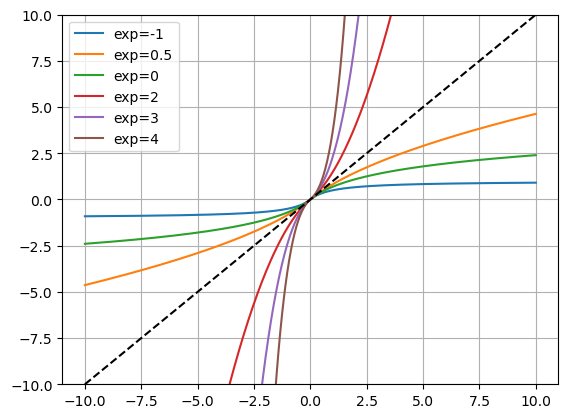

In [49]:
# Visualización de la función para valores positivos y negativos
for lmb in LMB:
    xp = potenciasSigno(x,lmb)
    plt.plot(x, xp, label=f'exp={lmb}')
plt.plot(x,np.sign(x)*np.abs(x), '--k')
plt.legend()
plt.ylim([-10,10])
plt.grid()

## Yeo-Johnson
$$
x'=\left\{
  \begin{array}{lr}
  \frac{(x+1)^{\lambda_1}-1}{\lambda_1} & \lambda_1\neq0,\quad x\geq0\\
  \ln(x+1) & \lambda_1=0,\quad x\geq0\\
  -\frac{(-x+1)^{\lambda_2}-1}{\lambda_2} & \lambda_2\neq0,\quad x<0\\
  -\ln(-x+1) & \lambda_2=0,\quad x<0.
  \end{array}
  \right.
$$
Donde $\lambda_1+\lambda_2=2$.

Se sustituye $\lambda_2=2-\lambda_1$.
$$
x'=\left\{
  \begin{array}{lr}
  \frac{(x+1)^{\lambda}-1}{\lambda} & \lambda\neq0,\quad x\geq0\\
  \ln(x+1) & \lambda=0,\quad x\geq0\\
  -\frac{(-x+1)^{2-\lambda}-1}{2-\lambda} & \lambda\neq2,\quad x<0\\
  -\ln(-x+1) & \lambda=2,\quad x<0.
  \end{array}
  \right.
$$

In [50]:
#Librerías con scipy
from scipy.stats import yeojohnson

In [51]:
LMB

[-1, 0.5, 0, 2, 3, 4]

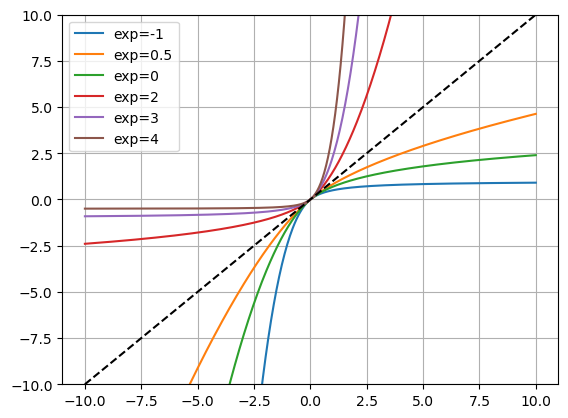

In [52]:
#Visualización de los datos con yeojohnson
for lmb in LMB:
    xp = yeojohnson(x,lmb)
    plt.plot(x, xp, label=f'exp={lmb}')
plt.plot(x,np.sign(x)*np.abs(x), '--k')
plt.legend()
plt.ylim([-10,10])
plt.grid()

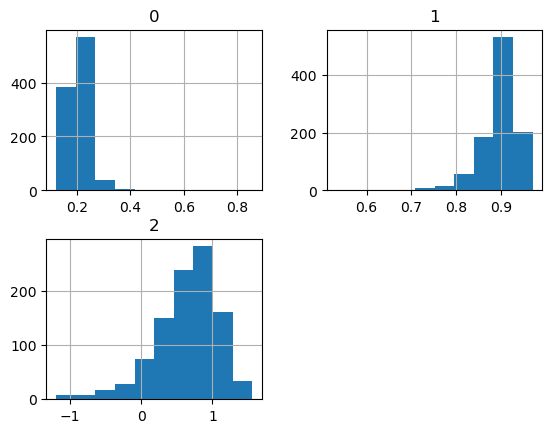

In [54]:
#Histogama de dataframe df
df.hist();

In [ ]:
#Copia de df
# yeojohnson para la variable 0
# Sesgo resultante sin desplazar = 0.04

In [55]:
# yeojohnson para la variable 1
df_copia = df.copy()

(-12.750782171845165, -0.09169695823244314)

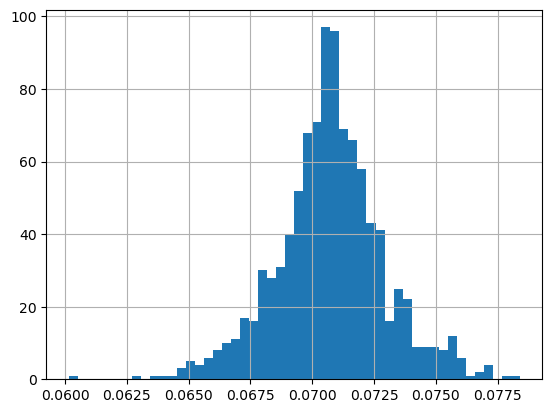

In [56]:
df_copia['0'], l = yeojohnson(df['0'])
df_copia['0'].hist(bins=50)
l, df_copia['0'].skew()

(22.18400028178734, -0.08515924216085065)

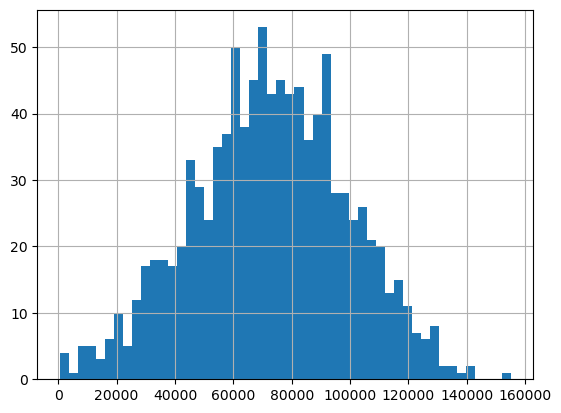

In [57]:
df_copia['1'], l = yeojohnson(df['1'])
df_copia['1'].hist(bins=50)
l, df_copia['1'].skew()

(2.033400951915617, -0.05193170490925183)

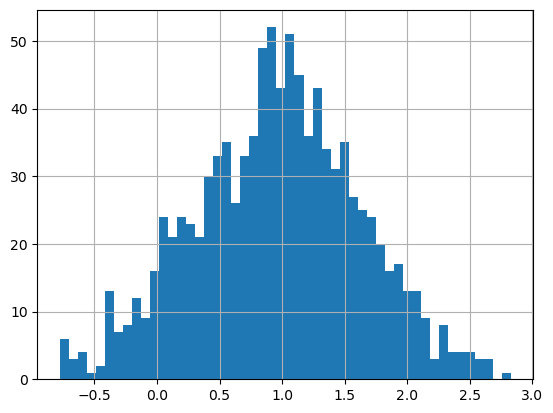

In [58]:
# yeojohnson para la variable 2
df_copia['2'], l = yeojohnson(df['2'])
df_copia['2'].hist(bins=50)
l, df_copia['2'].skew()

---
## Ejemplo de Regresión Lineal

In [59]:
reg = pd.read_csv('regresion.csv')

In [60]:
reg.head()

,x,y
0,0.100000,1.932916
1,0.101001,2.242087
2,0.102002,2.022414
3,0.103003,1.692315
4,0.104004,1.672025


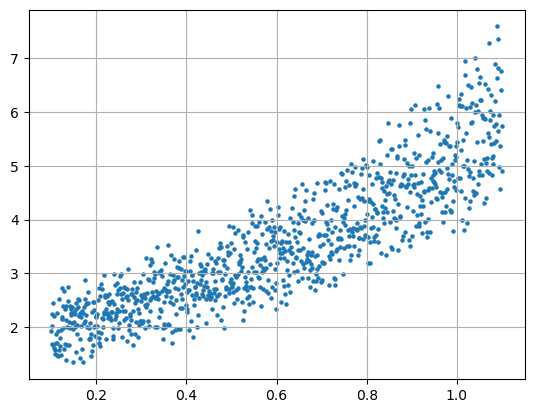

In [61]:
plt.scatter(reg['x'], reg['y'], s=5)
plt.grid()
plt.show()

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

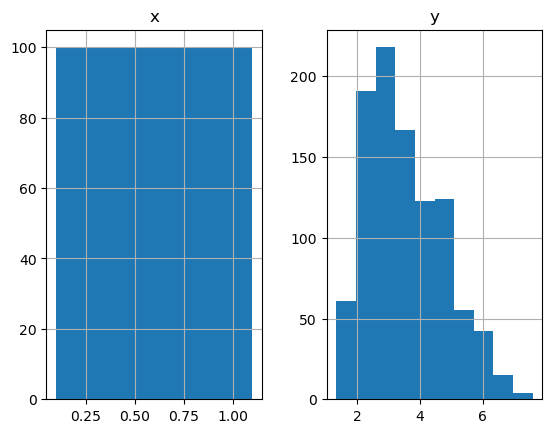

In [63]:
#Aplicar la transformación a y
reg.hist()

In [64]:
reg['yp'],l = yeojohnson(reg['y'] )
l

-0.16407006165112567

<Axes: >

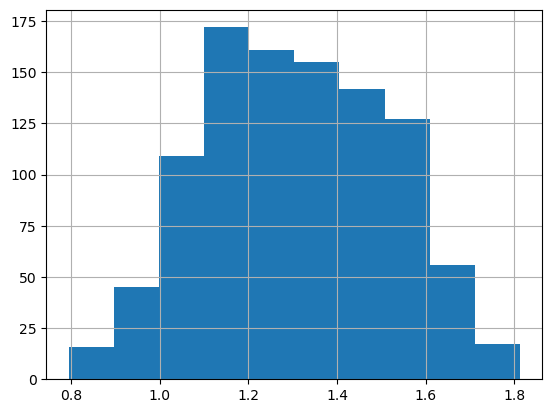

In [65]:
reg['yp'].hist()

In [68]:
lin = LinearRegression()
lin.fit(reg[['x']], reg[['yp']])


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#Train test split


In [ ]:
#Visualización de yp


In [ ]:
x_fit = np.linspace(0,1.5,100).reshape(1,-1)

$$
x=\left\{
  \begin{array}{lr}
  \frac{(x'+1)^{\lambda_1}-1}{\lambda_1} & \lambda_1\neq0,\quad x'\geq0\\
  \ln(x'+1) & \lambda_1=0,\quad x\geq0\\
  -\frac{(-x+1)^{\lambda_2}-1}{\lambda_2} & \lambda_2\neq0,\quad x'<0\\
  -\ln(-x+1) & \lambda_2=0,\quad x'<0.
  \end{array}
  \right.
$$

In [ ]:
#Implementar la función inversa de yeojohnson


#### Ejemplo 1: Reducción de asimetría y mejora de normalidad

Usaremos la variable `MedInc` (ingreso medio) del California Housing para comparar la asimetría y normalidad antes y después de aplicar Box-Cox y Yeo-Johnson.

In [69]:
from scipy.stats import boxcox, skew, normaltest
from sklearn.preprocessing import PowerTransformer
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)

x = df['MedInc']

# Box-Cox (solo positivos)
x_boxcox, lmbda = boxcox(x)

# Yeo-Johnson (acepta negativos, pero aquí todos son positivos)
pt = PowerTransformer(method='yeo-johnson')
x_yj = pt.fit_transform(x.values.reshape(-1,1)).flatten()


Asimetría original: 1.64653702990008
Asimetría Box-Cox: 0.0048759048766583
Asimetría Yeo-Johnson: -0.0025374252033172904
Normalidad original: 0.0
Normalidad Box-Cox: 5.80741698115316e-17
Normalidad Yeo-Johnson: 0.01675760630112639


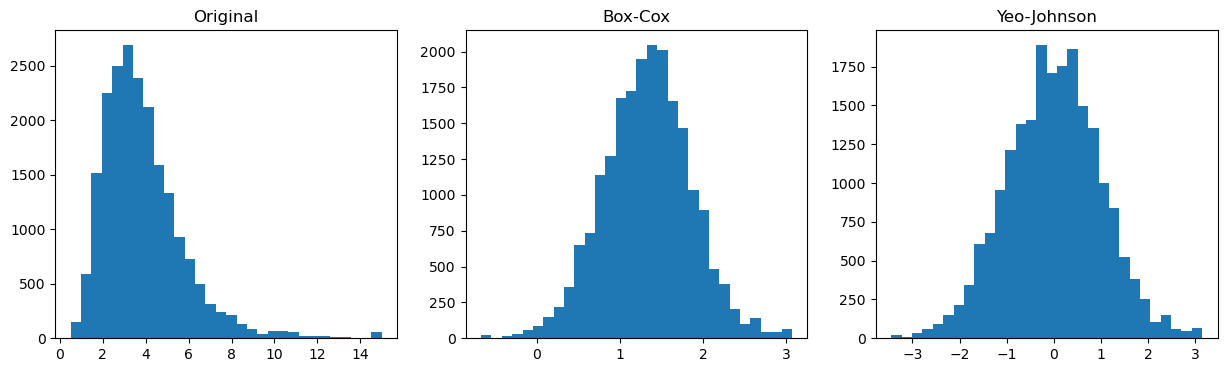

In [70]:

print('Asimetría original:', skew(x))
print('Asimetría Box-Cox:', skew(x_boxcox))
print('Asimetría Yeo-Johnson:', skew(x_yj))

print('Normalidad original:', normaltest(x).pvalue)
print('Normalidad Box-Cox:', normaltest(x_boxcox).pvalue)
print('Normalidad Yeo-Johnson:', normaltest(x_yj).pvalue)

plt.figure(figsize=(15,4))
plt.subplot(1,3,1); plt.hist(x, bins=30); plt.title('Original')
plt.subplot(1,3,2); plt.hist(x_boxcox, bins=30); plt.title('Box-Cox')
plt.subplot(1,3,3); plt.hist(x_yj, bins=30); plt.title('Yeo-Johnson')
plt.show()

#### Ejemplo 2: Mejorar el desempeño de un modelo lineal

Compara el desempeño de una regresión lineal simple para predecir el valor medio de la casa (`MedHouseVal`) usando la variable `AveOccup` original y transformada (Box-Cox y Yeo-Johnson).


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_orig = df[['AveOccup']]
y = fetch_california_housing().target

# Box-Cox (solo positivos)
X_boxcox, _ = boxcox(df['AveOccup'] + 1)

# Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')
X_yj = pt.fit_transform(df[['AveOccup']])


In [72]:
# Modelos
lr_orig = LinearRegression().fit(X_orig, y)
lr_boxcox = LinearRegression().fit(X_boxcox.reshape(-1,1), y)
lr_yj = LinearRegression().fit(X_yj, y)

y_pred_orig = lr_orig.predict(X_orig)
y_pred_boxcox = lr_boxcox.predict(X_boxcox.reshape(-1,1))
y_pred_yj = lr_yj.predict(X_yj)

In [73]:
print('MSE original:', mean_squared_error(y, y_pred_orig))
print('MSE Box-Cox:', mean_squared_error(y, y_pred_boxcox))
print('MSE Yeo-Johnson:', mean_squared_error(y, y_pred_yj))

MSE original: 1.330800018393102
MSE Box-Cox: 1.2340821751881983
MSE Yeo-Johnson: 1.2340821752615703


#### Ejemplo3: Mejorando modelos multivariados con transformaciones

En este ejemplo, se comparan modelos de regresión lineal multivariada usando variables originales y transformadas (Box-Cox y Yeo-Johnson) para predecir el valor medio de la casa (`MedHouseVal`).

In [74]:
from sklearn.model_selection import train_test_split

# Seleccionamos varias variables numéricas
X = df[['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]
y = fetch_california_housing().target


In [75]:
# Box-Cox requiere todas las variables positivas
X_boxcox = X.copy()
for col in X_boxcox.columns:
    X_boxcox[col], _ = boxcox(X_boxcox[col] + 1)

# Yeo-Johnson acepta negativos
pt_multi = PowerTransformer(method='yeo-johnson')
X_yj = pt_multi.fit_transform(X)


In [76]:
# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
Xb_train, Xb_test, _, _ = train_test_split(X_boxcox, y, random_state=42)
Xy_train, Xy_test, _, _ = train_test_split(X_yj, y, random_state=42)


In [77]:
# Modelos multivariados
lr_orig = LinearRegression().fit(X_train, y_train)
lr_boxcox = LinearRegression().fit(Xb_train, y_train)
lr_yj = LinearRegression().fit(Xy_train, y_train)


In [78]:
y_pred_orig = lr_orig.predict(X_test)
y_pred_boxcox = lr_boxcox.predict(Xb_test)
y_pred_yj = lr_yj.predict(Xy_test)

print('MSE multivariado original:', mean_squared_error(y_test, y_pred_orig))
print('MSE multivariado Box-Cox:', mean_squared_error(y_test, y_pred_boxcox))
print('MSE multivariado Yeo-Johnson:', mean_squared_error(y_test, y_pred_yj))

MSE multivariado original: 0.6633793098439004
MSE multivariado Box-Cox: 0.6154412826575334
MSE multivariado Yeo-Johnson: 0.6154412869508115


Estas transformaciones no solo mejoran la simetría, sino que también pueden tener beneficios adicionales, como facilitar la interpretación de los resultados y hacer que los datos sean más apropiados para ciertos análisis estadísticos.

Es importante señalar que la elección de la transformación adecuada depende de la naturaleza de los datos y los objetivos del análisis. La visualización de las distribuciones transformadas mediante histogramas proporciona una herramienta valiosa para evaluar la efectividad de las transformaciones en la mejora de la simetría.

- **Cuadrática y cúbica:** Útiles para modelar relaciones no lineales, pero pueden aumentar la asimetría.
- **Box-Cox:** Busca normalidad, solo para valores positivos.
- **Yeo-Johnson:** Busca normalidad, acepta valores negativos y ceros.


| Transformación | Ventajas | Desventajas | Cuándo usar |
|---------------|----------|-------------|-------------|
| Cuadrática/Cúbica | Modelar relaciones no lineales | Puede aumentar asimetría, sensible a outliers | Cuando se sospecha relación polinómica |
| Box-Cox | Normaliza, ajusta asimetría positiva | Solo positivos | Cuando la variable es positiva y asimétrica |
| Yeo-Johnson | Normaliza, acepta negativos y ceros | Menos interpretable, más costosa | Cuando hay valores negativos o ceros |

- Analizar la distribución antes y después de transformar.
- Usar Box-Cox o Yeo-Johnson si se busca la normalidad para modelos lineales o tests estadísticos.
- Usar potencias si se busca modelar relaciones polinómicas.